# Projeto 7: Aglomeração Hierárquica

Entregue!

(150, 4)


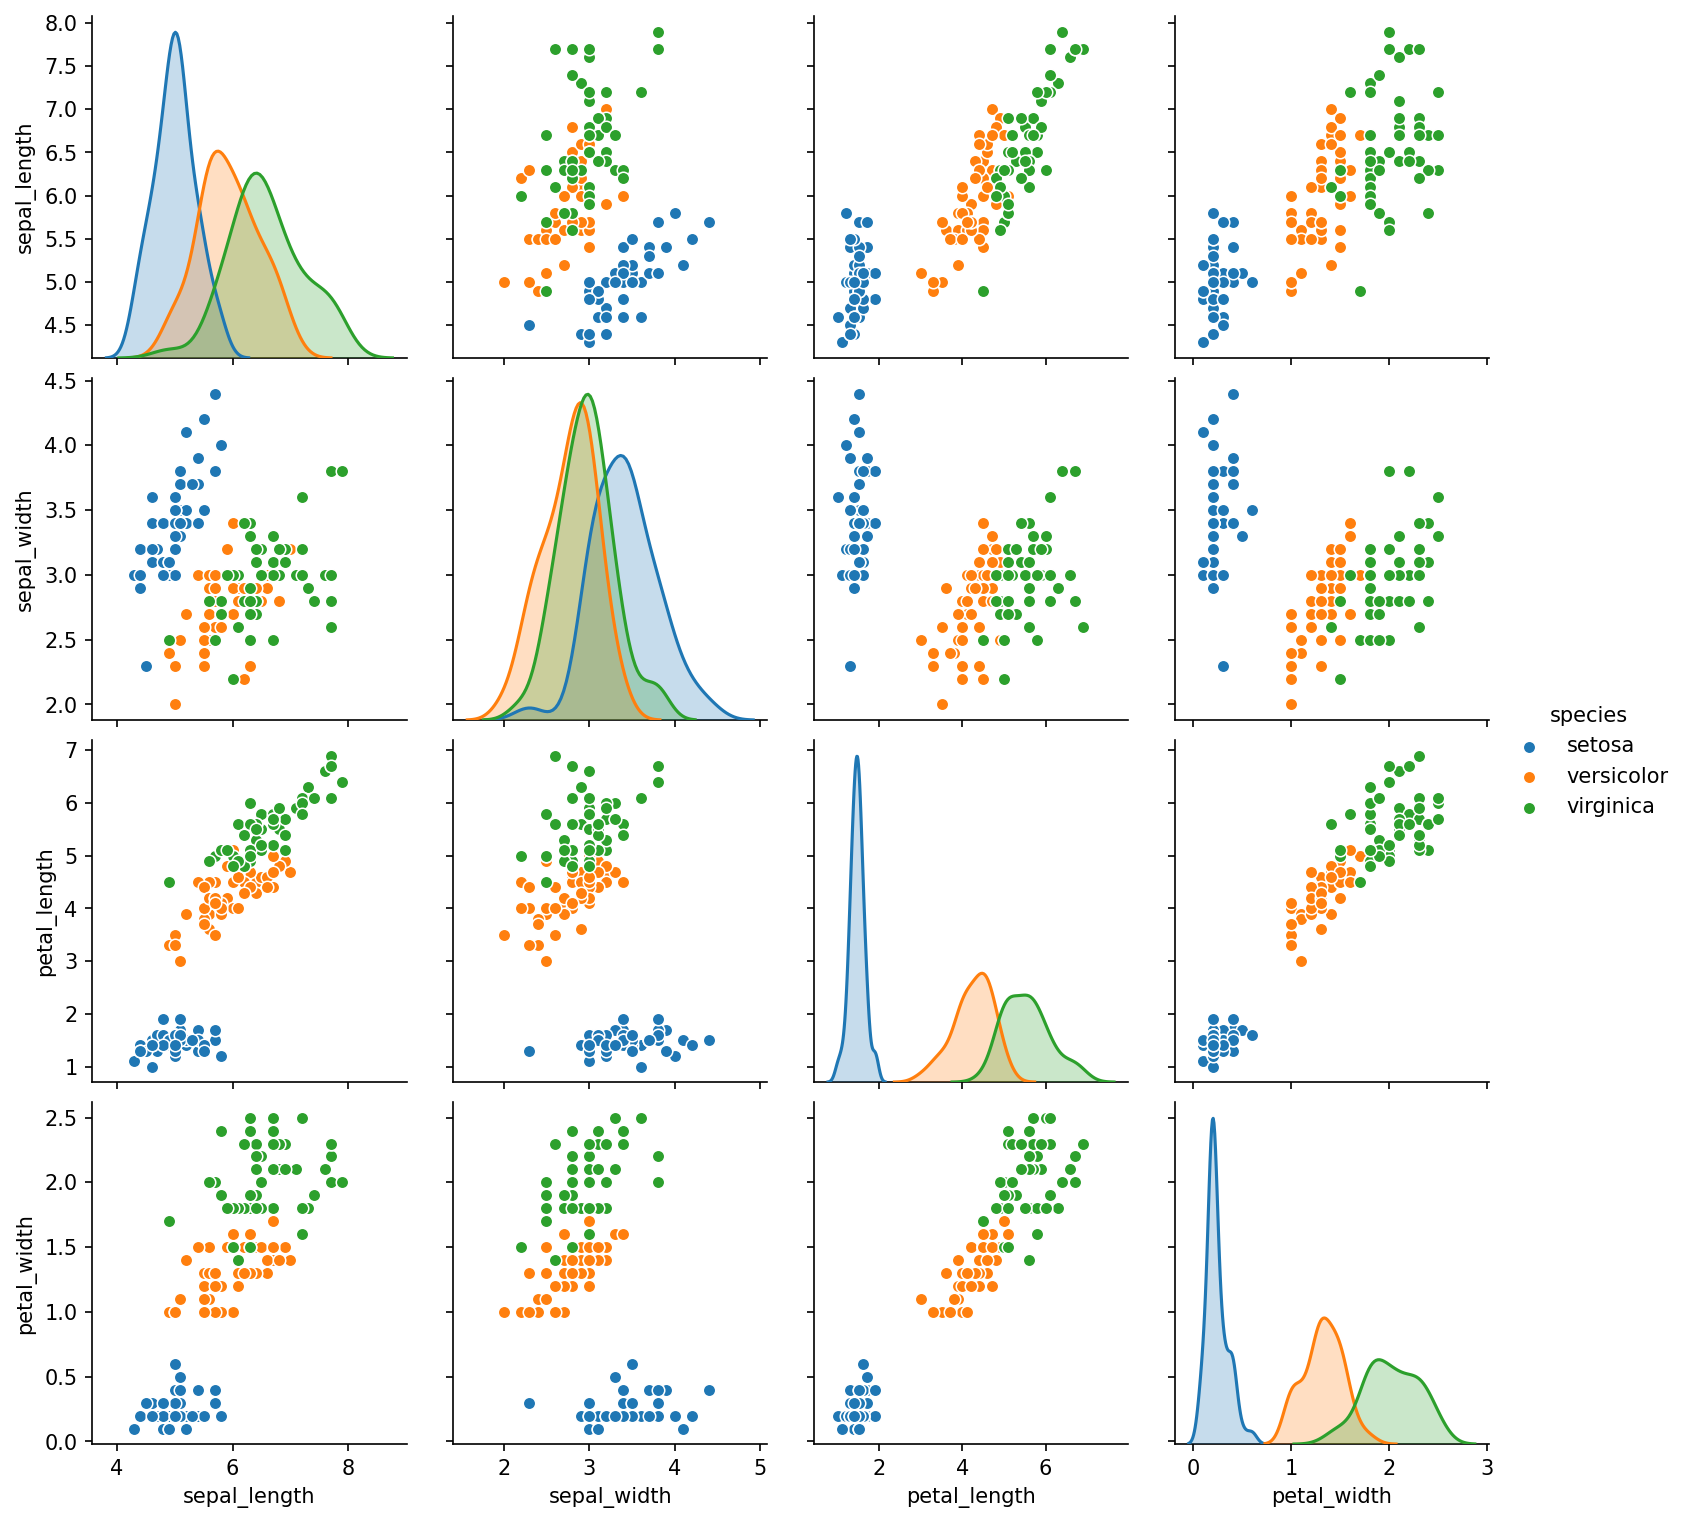

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.dpi'] = 150

iris= pd.read_csv('../iris.cvs')
sns.pairplot(iris, hue = 'species') 
# print(iris_data)

#copy data with no labels
iris_data = iris.drop(['species'], axis=1, inplace = False)
# print(iris_data)

data = iris_data.values
print(data.shape)

### Parte A: Obter os dendrogramas para os dados Iris (usando as 4 medidas) através dos métodos aglomerativos hierárquicos:  single-linkage, complete-linkage, médias e Ward.

Single Linkage, single, 0
Average Linkage, average, 1
Complete Linkage, complete, 2
Ward Linkage, ward, 3


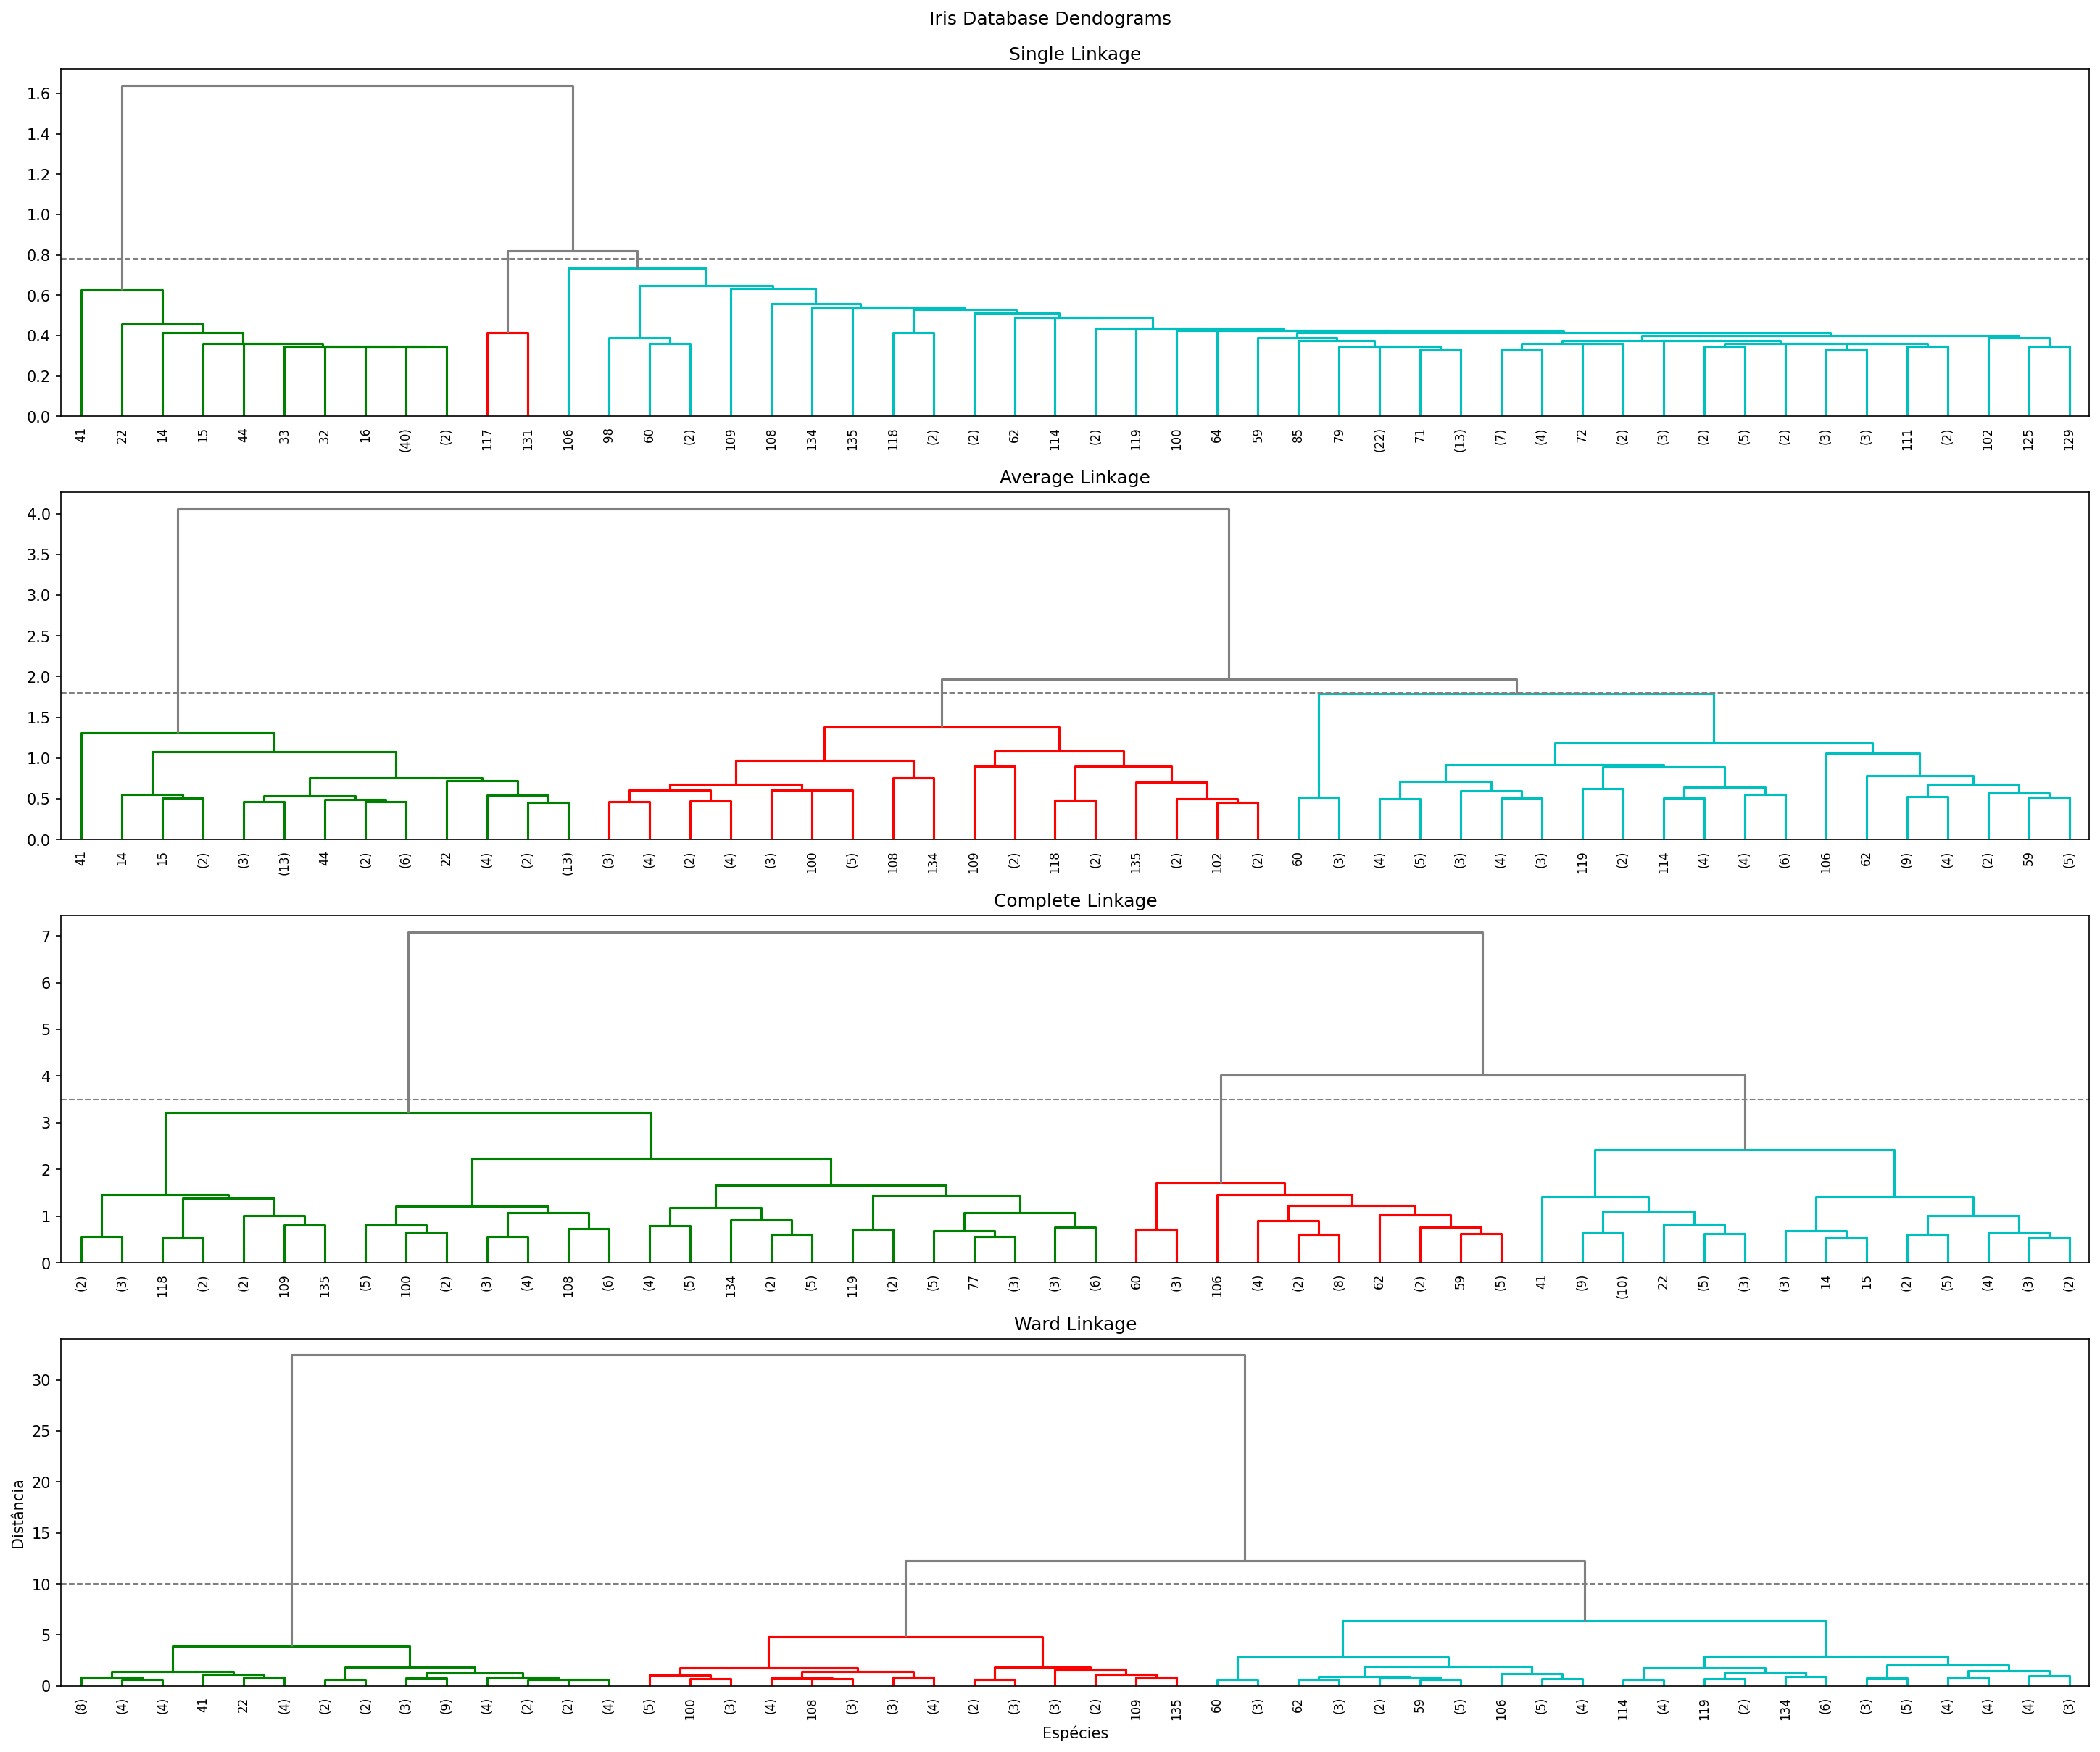

In [3]:
fig, ax = plt.subplots(4, 1, figsize=(9.6*2,8*2), sharex=False,constrained_layout=True)
ax = ax.flatten()
fig.suptitle("Iris Database Dendograms")

clustering_algorithms = (
    ('Single Linkage',   'single', 0, 0.78),
    ('Average Linkage',  'average', 1, 1.8),
    ('Complete Linkage', 'complete', 2, 3.5),
    ('Ward Linkage',     'ward', 3, 10),
)
for name, method, index, threshold in clustering_algorithms:
    print("%s, %s, %s" %(name, method, index))
    links = linkage(data, method)
    ax[index].set_title(name)
    dendrogram(links,truncate_mode='lastp',p=50, color_threshold=threshold, above_threshold_color='grey',leaf_rotation=90.,leaf_font_size=8., ax = ax[index], orientation='top', )

ax[0].axhline(y=0.78, c='grey', lw=1, linestyle='dashed')
ax[1].axhline(y=1.8, c='grey', lw=1, linestyle='dashed')
ax[2].axhline(y=3.5, c='grey', lw=1, linestyle='dashed')
ax[3].axhline(y=10, c='grey', lw=1, linestyle='dashed')

plt.xlabel('Espécies')
plt.ylabel('Distância')
plt.show()

## Parte B: Visualizar e discutir o interrelacionamento entre os dendrogramas.

Para vizualizar melhor vamos plotar os clusters encontrados destacando a classificação dada a cada ponto para comparar com os targets reais.

Single Linkage, single, 0
Average Linkage, average, 1
Complete Linkage, complete, 2
Ward Linkage, ward, 3


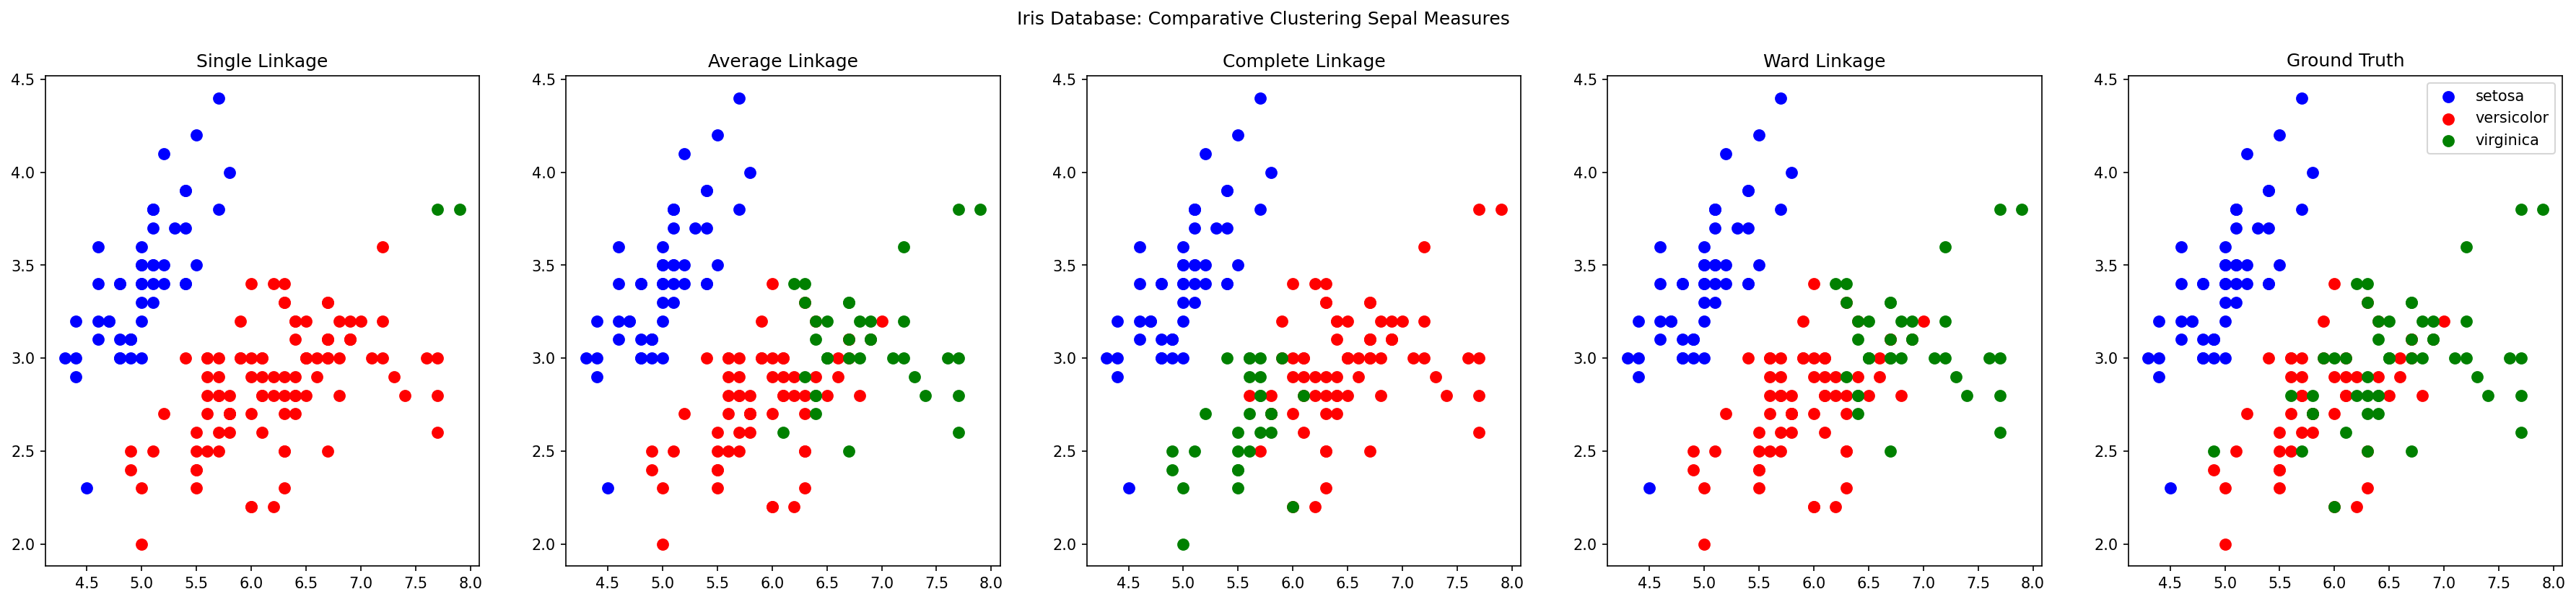

In [4]:
from sklearn.cluster import AgglomerativeClustering
X = data
clusters_1 = {}

fig, ax = plt.subplots(1, 5, figsize=(6*5,6), sharey = False)
fig.suptitle("Iris Database: Comparative Clustering Sepal Measures")

clustering_algorithms = (
    ('Single Linkage',   'single', 0),
    ('Average Linkage',  'average', 1),
    ('Complete Linkage', 'complete', 2),
    ('Ward Linkage',     'ward', 3),
)
for name, method, index in clustering_algorithms:
    print("%s, %s, %s" %(name, method, index))
    # Separação em 3 clusters para as 3 especies de planta
    model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=method)
    model.fit(X)
    labels = model.labels_
    
    # Fix to match colors
#     if method == 'complete':
#         labels[labels== 0]= 9
#         labels[labels== 2]= 0
#         labels[labels== 9]= 2
    
    #save the predicted targets for the method
    clusters_1[method]=labels
    
    # Plot the result with different colors for each group
    ax[index].scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
    ax[index].scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
    ax[index].scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
#     ax[index].set_xlim(0,8)
#     ax[index].set_ylim(0,3)
    ax[index].set_title(name)   

# Obtaining the original species
label_1 = np.copy(iris['species'])

# Plot the true result with different colors for each group
ax[4].scatter(X[label_1=='setosa', 0], X[label_1=='setosa', 1], s=50, marker='o', color='blue', label='setosa')
ax[4].scatter(X[label_1=='versicolor', 0], X[label_1=='versicolor', 1], s=50, marker='o', color='red', label='versicolor')
ax[4].scatter(X[label_1=='virginica', 0], X[label_1=='virginica', 1], s=50, marker='o', color='green', label = 'virginica')
ax[4].set_title("Ground Truth")
# ax[4].set_xlim(0,8)
# ax[4].set_ylim(0,3)
plt.legend()
plt.show()

Nesse caso a análise visual mostra que os métodos Avarege e Ward se aproximaram bem do resultado esperado e o single mostrou o pior resultado.

Single Linkage, single, 0
Average Linkage, average, 1
Complete Linkage, complete, 2
Ward Linkage, ward, 3


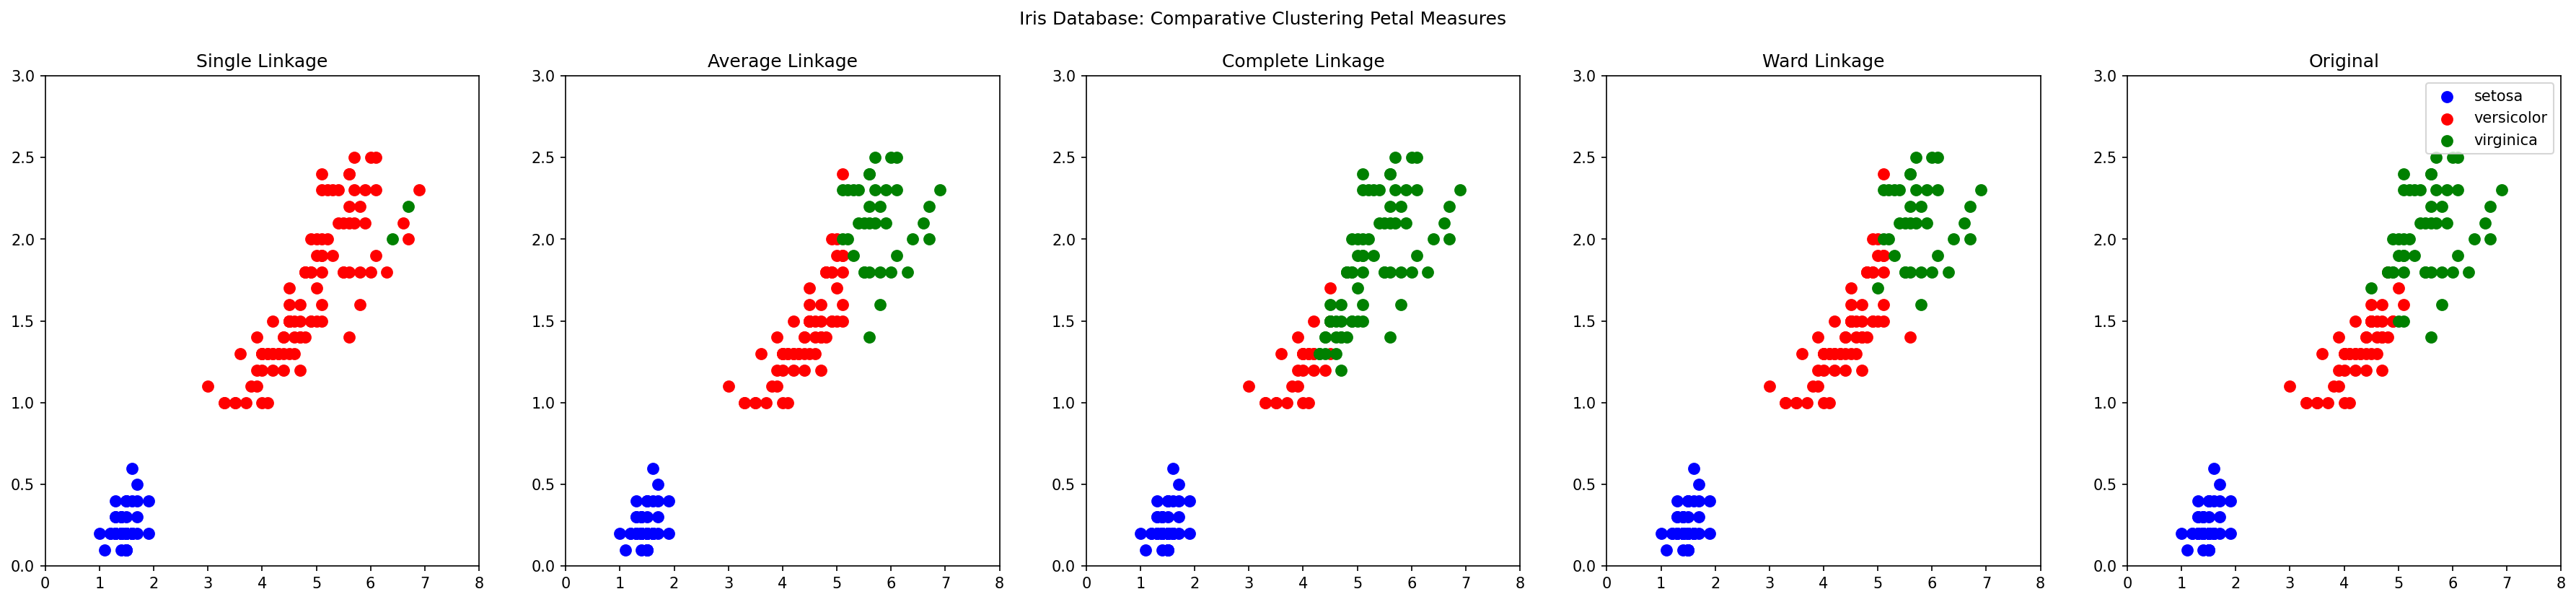

In [5]:
from sklearn.cluster import AgglomerativeClustering
X = data
clusters_2 = {}

fig, ax = plt.subplots(1, 5, figsize=(6*5,6), sharey = False)
fig.suptitle("Iris Database: Comparative Clustering Petal Measures")

clustering_algorithms = (
    ('Single Linkage',   'single', 0),
    ('Average Linkage',  'average', 1),
    ('Complete Linkage', 'complete', 2),
    ('Ward Linkage',     'ward', 3),
)
for name, method, index in clustering_algorithms:
    print("%s, %s, %s" %(name, method, index))
    # Separação em 3 clusters para as 3 especies de planta
    model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=method)
    model.fit(X)
    labels = model.labels_
    
    # Fix to match colors
    if method == 'complete':
        labels[labels== 0]= 9
        labels[labels== 2]= 0
        labels[labels== 9]= 2
    
    # Plot the result with different colors for each group
    clusters_2[method]=labels
    ax[index].scatter(X[labels==0, 2], X[labels==0, 3], s=50, marker='o', color='red')
    ax[index].scatter(X[labels==1, 2], X[labels==1, 3], s=50, marker='o', color='blue')
    ax[index].scatter(X[labels==2, 2], X[labels==2, 3], s=50, marker='o', color='green')
    ax[index].set_xlim(0,8)
    ax[index].set_ylim(0,3)
    ax[index].set_title(name)   

# Obtaining the original species
label_2 = np.copy(iris['species'])

# Plot the true result with different colors for each group
ax[4].scatter(X[label_2=='setosa', 2], X[label_2=='setosa', 3], s=50, marker='o', color='blue', label='setosa')
ax[4].scatter(X[label_2=='versicolor', 2], X[label_2=='versicolor', 3], s=50, marker='o', color='red', label='versicolor')
ax[4].scatter(X[label_2=='virginica', 2], X[label_2=='virginica', 3], s=50, marker='o', color='green', label = 'virginica')
ax[4].set_title("Original")
ax[4].set_xlim(0,8)
ax[4].set_ylim(0,3)
plt.legend()
plt.show()

## Parte C: Obter as matrizes de confusão para cada um dos 4 casos.  Pode ser montado manualmente a partir dos dendrogramas, considerando-se uns 30 pontos de cada categoria.  Também é possível cortar o dendrograms em 3 ramos e obter a matriz considerando-se todos os pontos, mas isso fica como opcional.

### Sepal attributes

In [6]:
y_true = np.copy(label_1)
y_true[y_true=='versicolor']= 0
y_true[y_true=='setosa']= 1
y_true[y_true=='virginica']= 2
#Type match
y_true = np.array(y_true, dtype='int64')

for name in clusters_1:
    print("Matrix de confusão para o método %s:"%name)
    y_pred = clusters_1[name]
    print(confusion_matrix(y_true, y_pred))
    print("\n\n")


Matrix de confusão para o método single:
[[50  0  0]
 [ 0 50  0]
 [48  0  2]]



Matrix de confusão para o método average:
[[50  0  0]
 [ 0 50  0]
 [14  0 36]]



Matrix de confusão para o método complete:
[[23  0 27]
 [ 0 50  0]
 [49  0  1]]



Matrix de confusão para o método ward:
[[49  0  1]
 [ 0 50  0]
 [15  0 35]]





### Petal attributes

In [7]:
y_true = np.copy(label_2)
y_true[y_true=='versicolor']= 0
y_true[y_true=='setosa']= 1
y_true[y_true=='virginica']= 2
#Type match
y_true = np.array(y_true, dtype='int64')

for name in clusters_2:
    print("Matrix de confusão para o método %s:"%name)
    y_pred = clusters_2[name]
    print(confusion_matrix(y_true, y_pred))
    print("\n\n")

Matrix de confusão para o método single:
[[50  0  0]
 [ 0 50  0]
 [48  0  2]]



Matrix de confusão para o método average:
[[50  0  0]
 [ 0 50  0]
 [14  0 36]]



Matrix de confusão para o método complete:
[[27  0 23]
 [ 0 50  0]
 [ 1  0 49]]



Matrix de confusão para o método ward:
[[49  0  1]
 [ 0 50  0]
 [15  0 35]]



